In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stations = ['Quixada', 'Araripe', 'Fortaleza', 'Itatira']
columnData = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Atmospheric pressure']
sns.set(rc={'figure.figsize':(11, 4)})
#Load Original Data
dataFrames = []
for s in stations:
    print(s+'CSV.csv')
    dataFrames.append(pd.read_csv(s+'CSV.csv', index_col=0, parse_dates=True))
    dataFrames.append(pd.read_csv(s+'Drop.csv', index_col=0, parse_dates=True))
    
#originalData = pd.read_csv('QuixadaCSV.csv', index_col=0, parse_dates=True)
#dropData = pd.read_csv('QuixadaDrop.csv', index_col=0, parse_dates=True)

QuixadaCSV.csv
AraripeCSV.csv
FortalezaCSV.csv
ItatiraCSV.csv


In [3]:
interpolData = []
#Baricentrico -> time
#Lagrange-> polynomial
#Cubis splines -> splines order=3
for i in range(0,len(dataFrames)-1, 2):
    interpolData.append(dataFrames[i+1].copy())
for df in interpolData:
    df = df.resample('H').mean()
    for variable in columnData:
        print(variable)
        df[variable] = df[variable].interpolate(method='pchip')
#Checking Interpolation Errors
# ---> 
interpolEval = []
for i in range(6):
    interpolEval.append(dataFrames[3].copy())
for i in range(6):
    interpolEval.append(dataFrames[7].copy())


Temperature
Relative Humidity
Wind Speed
Atmospheric pressure
Temperature
Relative Humidity
Wind Speed
Atmospheric pressure
Temperature
Relative Humidity
Wind Speed
Atmospheric pressure
Temperature
Relative Humidity
Wind Speed
Atmospheric pressure


QuixadaCSV.csv
AraripeCSV.csv
FortalezaCSV.csv
ItatiraCSV.csv
1.251217760947706
1.251217760947706
1.251217760947706
1.251217760947706
3.615403308545543
3.615403308545543
3.615403308545543
3.615403308545543
0.03276179941735505
0.03276179941735505
0.03276179941735505
0.03276179941735505
0.03206598324439401
0.03206598324439401
0.03206598324439401
0.03206598324439401


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/lib/python3

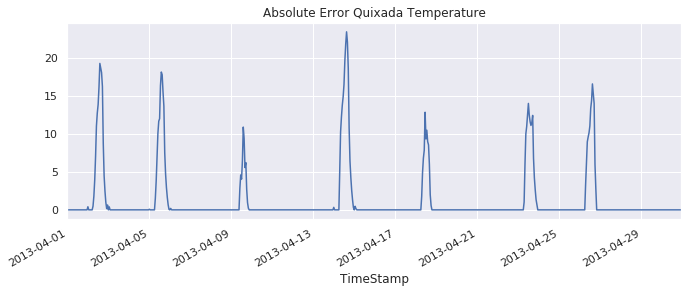

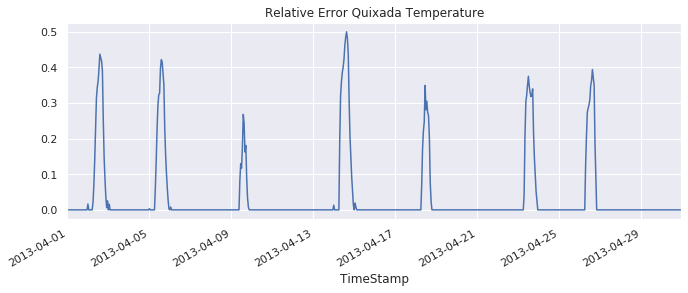

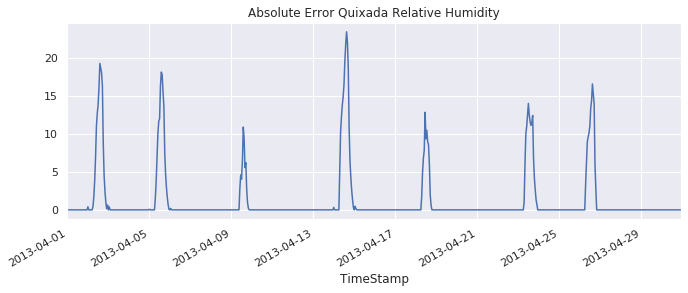

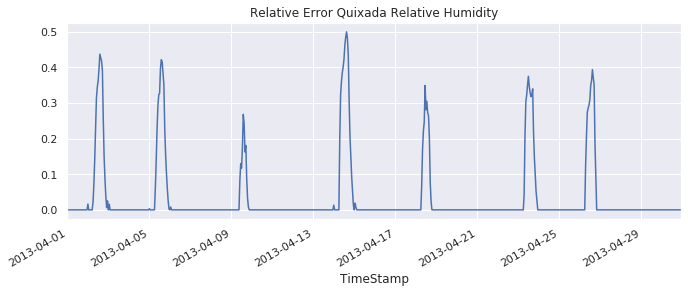

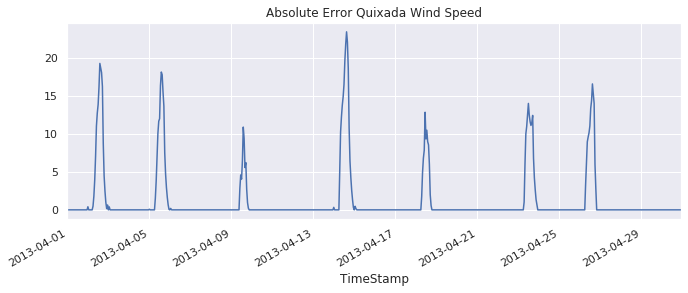

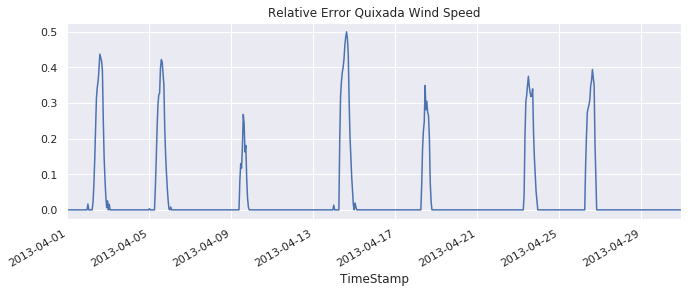

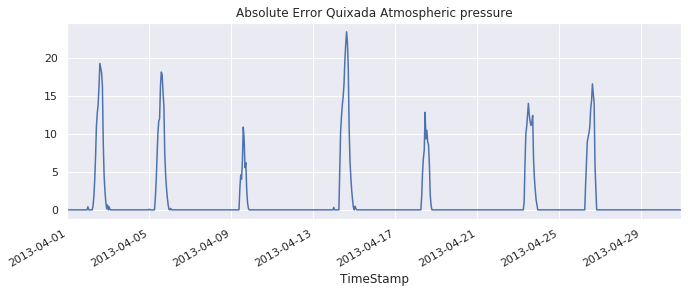

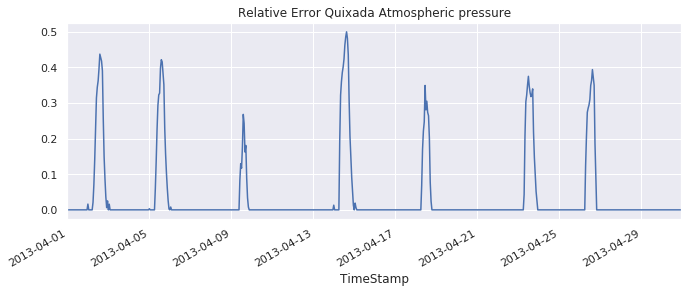

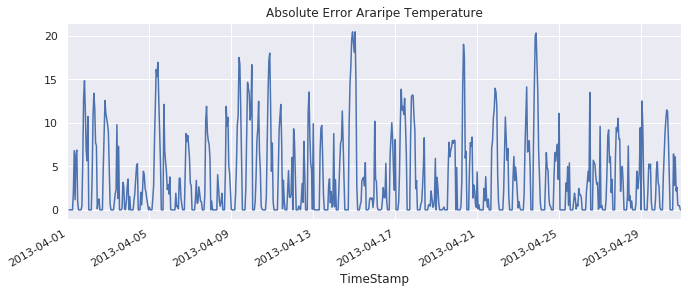

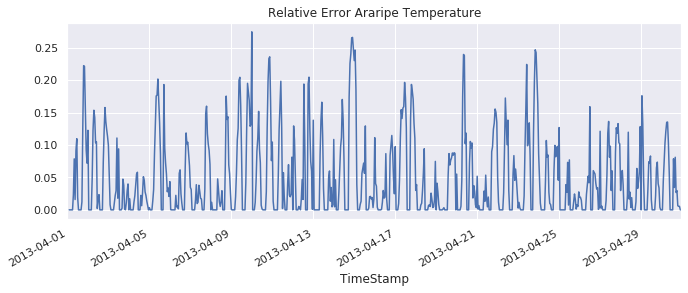

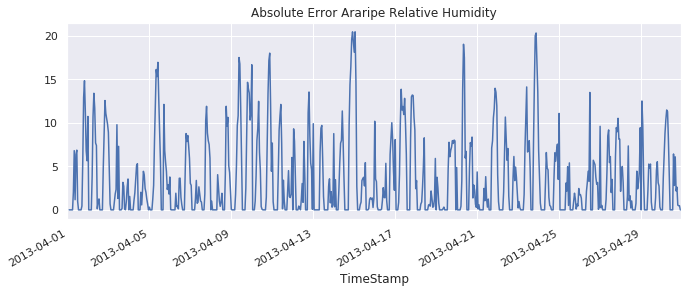

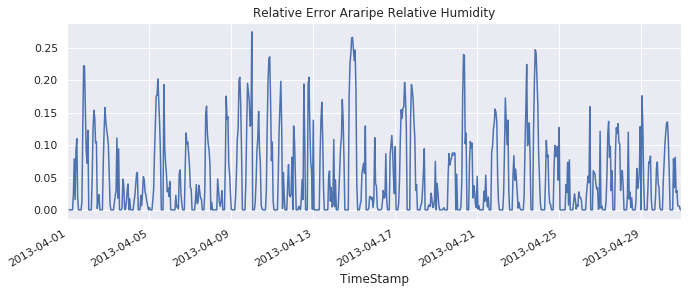

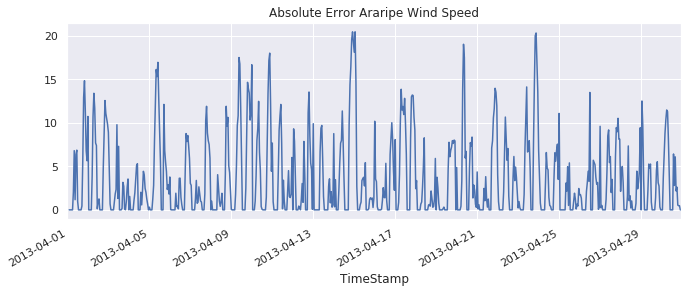

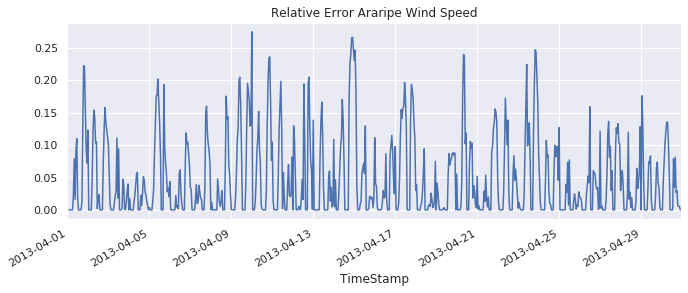

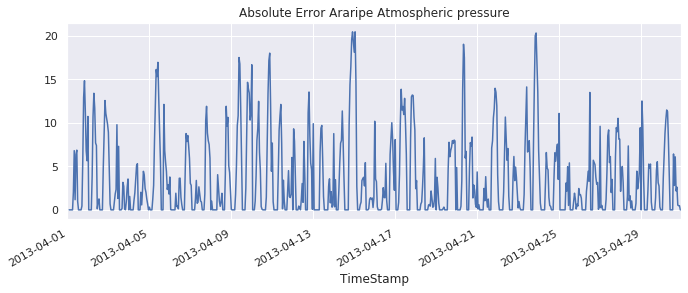

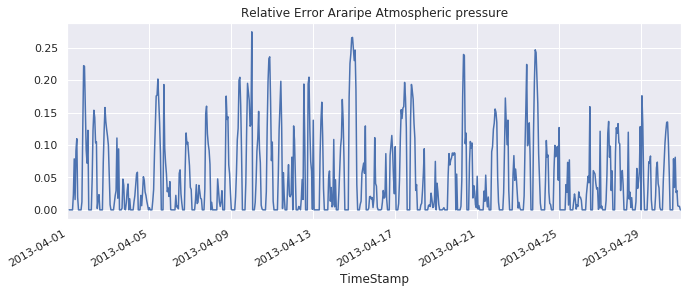

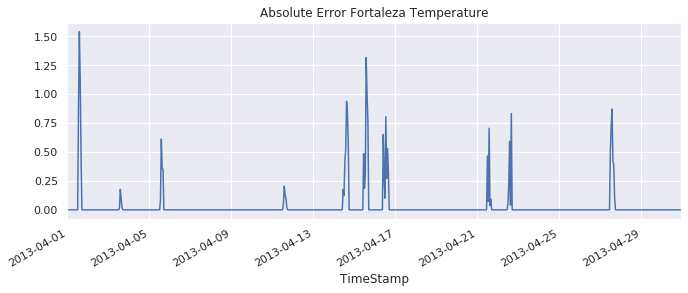

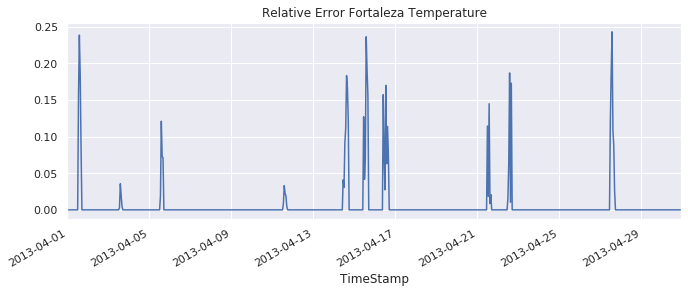

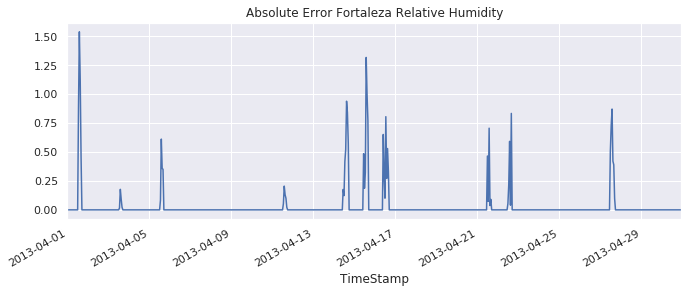

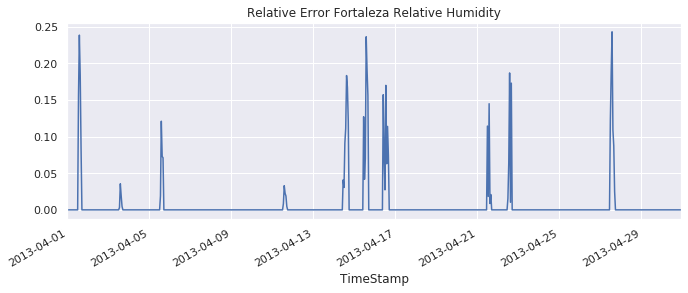

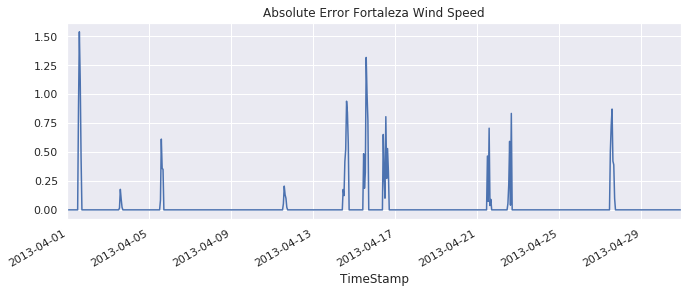

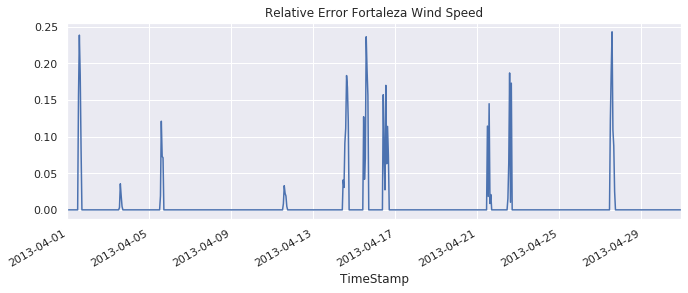

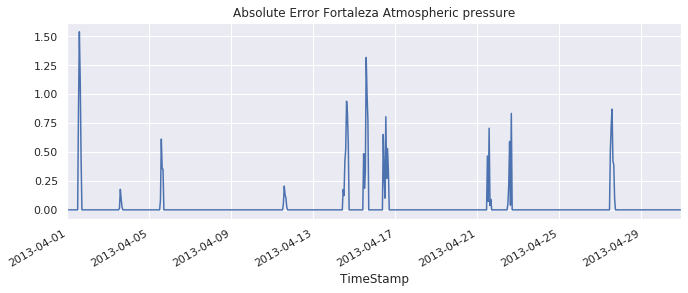

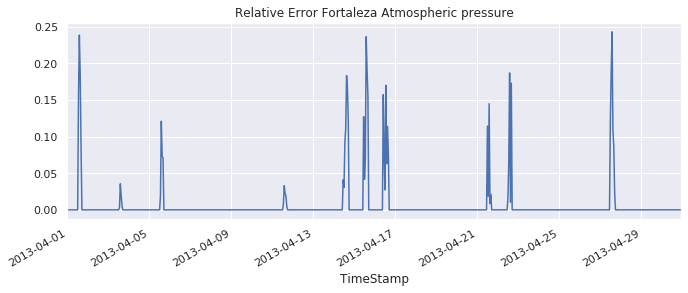

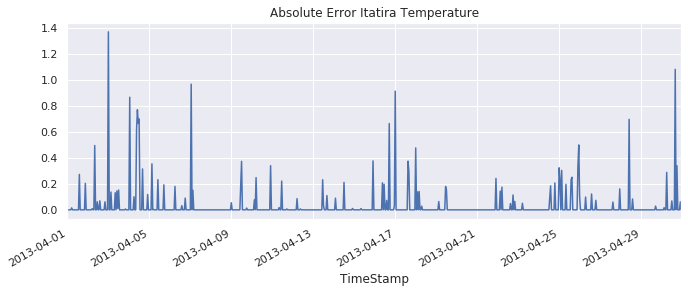

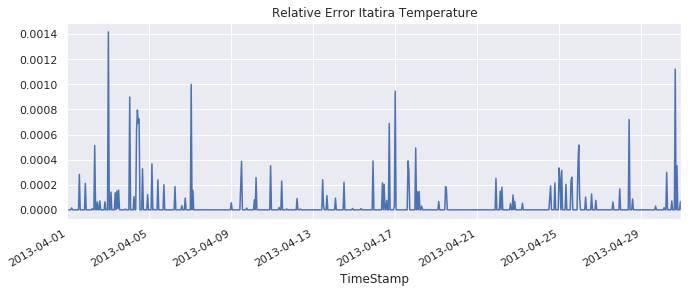

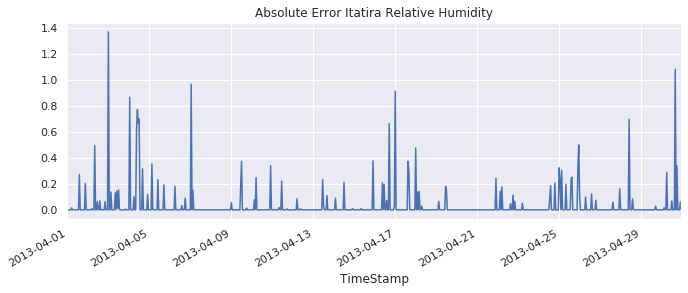

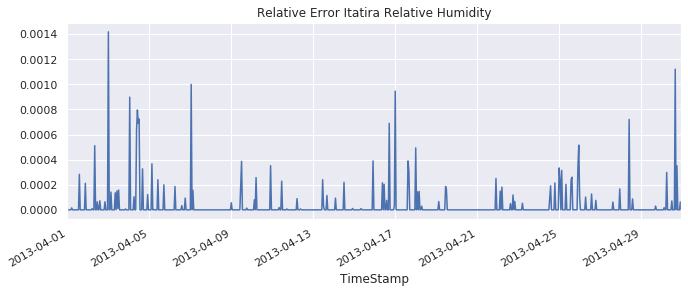

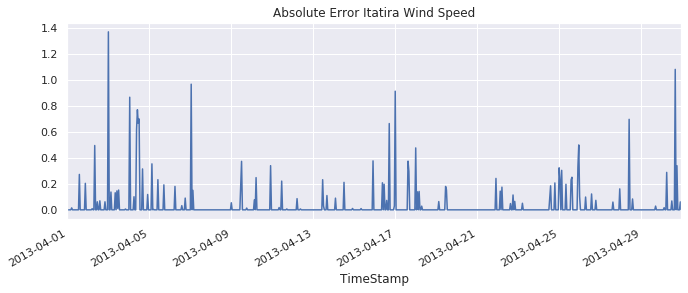

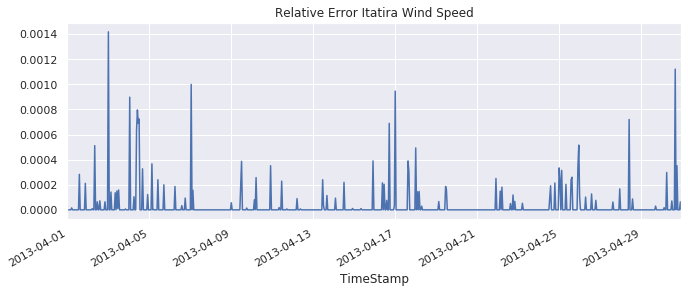

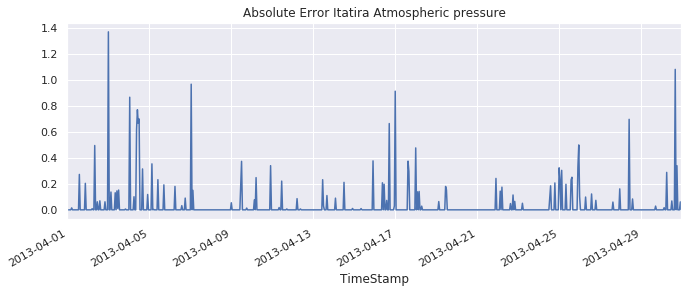

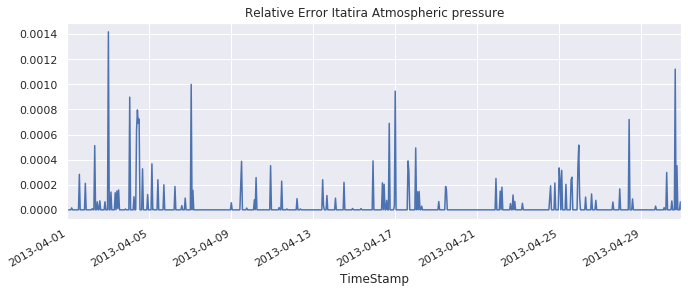

In [23]:
interP = []
original = []
for s in stations:
    print(s + 'CSV.csv')
    original.append(pd.read_csv(s + 'CSV.csv', index_col=0, parse_dates=True))
    interP.append(pd.read_csv(s + 'Drop.csv', index_col=0, parse_dates=True))

columnData = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Atmospheric pressure']
ecolumnData = ['OTemp', 'ORela', 'OWind', 'OPres']

result = []

for i in range(4):
    result.append(interP[i].resample('H').mean())
for i in range(4):
    for var in columnData:
        result[i][var] = result[i][var].interpolate(method='pchip')

"""for i in range(4):
    for var in columnData:
        ax = plt.subplots()
        ax = original[i][var].plot(marker='x', alpha=0.3, linestyle='--', figsize=(20, 9), color='green', title=str(stations[i]+' '+ var), label='Original' + var)
        result[i][var].plot( marker='o', alpha=0.5, linestyle='-', figsize=(20, 9), label='Interpolada ' + var, ax=ax)
        plt.savefig(fname=stations[i]+"Interp"+var + str(i) + ".png", dpi=300)
        """
for df in original:
    df = df.rename(columns={'Temperature':'OTemp', 'Relative Humidity':'ORela', 'Wind Speed':'OWind', 'Atmospheric pressure':'OPres'}, inplace=True)
        
for i in range(4):
    result[i] = pd.concat([original[i], result[i]], axis=1, sort=True).reindex(original[i].index)

for i in range(4):
    for var in columnData:
        result[i]['Absolute'+var] = abs(result[i][ecolumnData[i]] - result[i][columnData[i]])
        result[i]['Relative'+var] = abs((result[i][ecolumnData[i]] - result[i][columnData[i]])/result[i][ecolumnData[i]])
        print(result[i]['Absolute'+var].mean())
i = 0
for df in result:
    for var in columnData:
        ax = plt.subplots()
        df['Absolute'+var].plot(title="Absolute Error " + stations[i] + " " + var )
        plt.savefig(fname="AbsErr"+stations[i]+var + str(i) + ".png", dpi=300)
        ax = plt.subplots()
        df['Relative'+var].plot(title="Relative Error " + stations[i] + " " + var )
        plt.savefig(fname="RelErr"+stations[i]+var + str(i) + ".png", dpi=300)
    i+=1
        

Spline Check
PCHIP Check
LaGrange Check
Barycentric Check
Akima CHeck


/home/mateo/.local/lib/python3.7/site-packages/scipy/interpolate/polyint.py:324: RuntimeWarning: overflow encountered in multiply
  pi = w*pi
/home/mateo/.local/lib/python3.7/site-packages/scipy/interpolate/polyint.py:325: RuntimeWarning: invalid value encountered in add
  p += pi[:,np.newaxis] * self.c[k]
/home/mateo/.local/lib/python3.7/site-packages/scipy/interpolate/polyint.py:325: RuntimeWarning: invalid value encountered in multiply
  p += pi[:,np.newaxis] * self.c[k]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists w

Krogh Check


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

                     Station  OTemp  Relative Humidity  Wind Speed  \
TimeStamp                                                            
2013-04-01 02:00:00  Araripe  19.84              68.90       1.614   
2013-04-01 03:00:00  Araripe  20.10              67.33       2.148   
2013-04-01 04:00:00  Araripe  20.03              71.10       1.733   
2013-04-01 05:00:00  Araripe  20.44              78.80       1.876   
2013-04-01 06:00:00  Araripe  20.34              87.40       1.680   
...                      ...    ...                ...         ...   
2013-04-30 20:00:00  Araripe  21.70              87.10       2.175   
2013-04-30 21:00:00  Araripe  21.25              88.60       2.001   
2013-04-30 22:00:00  Araripe  20.74              88.30       1.607   
2013-04-30 23:00:00  Araripe  20.37              88.20       1.620   
2013-04-30 00:00:00  Araripe  20.11              84.80       1.284   

                     Atmospheric pressure  Temperature  Relative Humidity  \
TimeStamp   

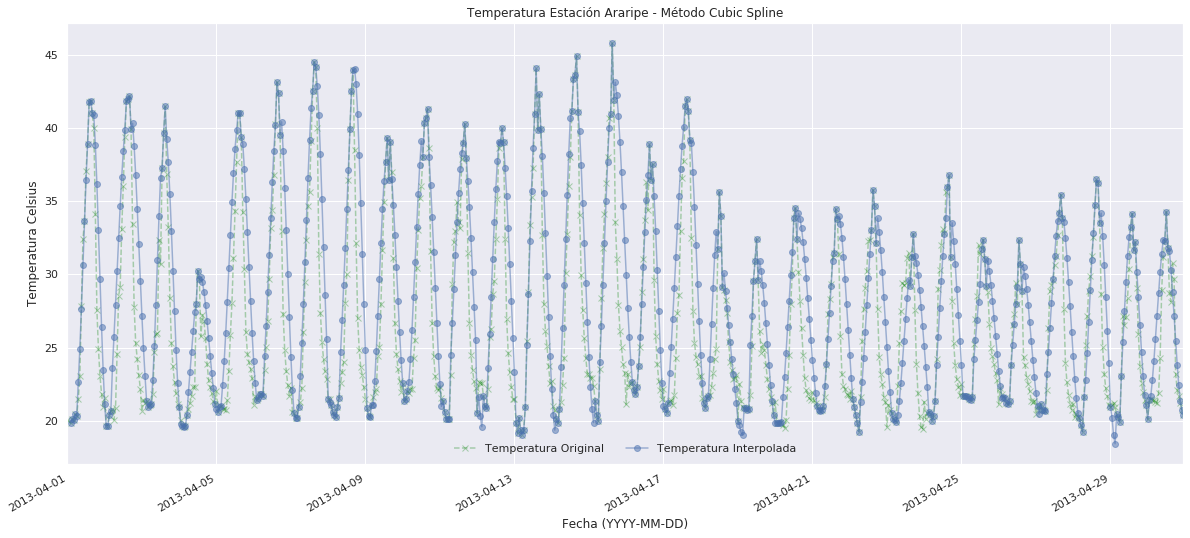

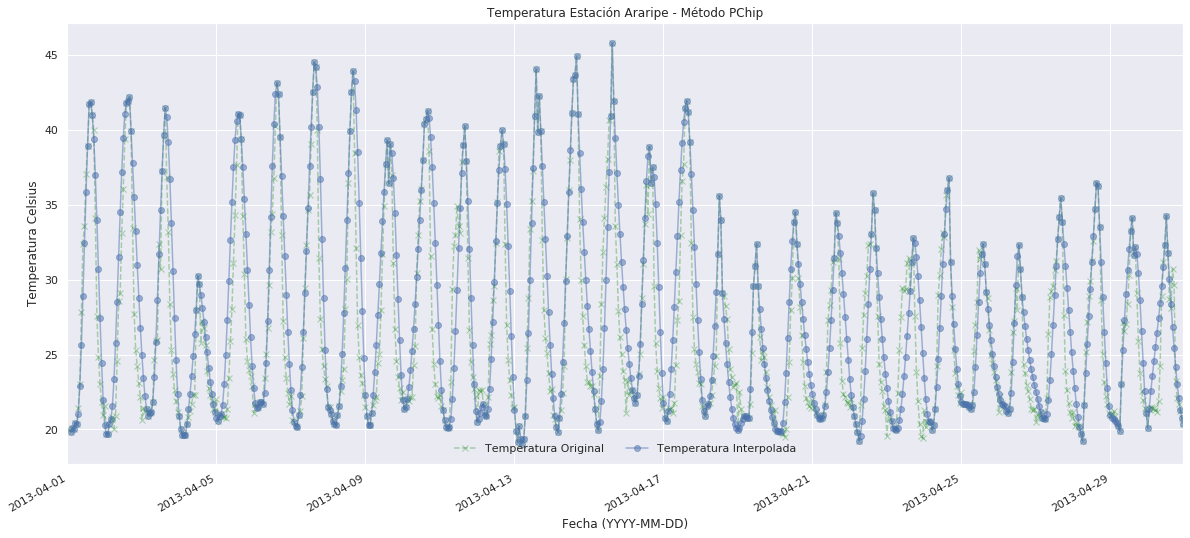

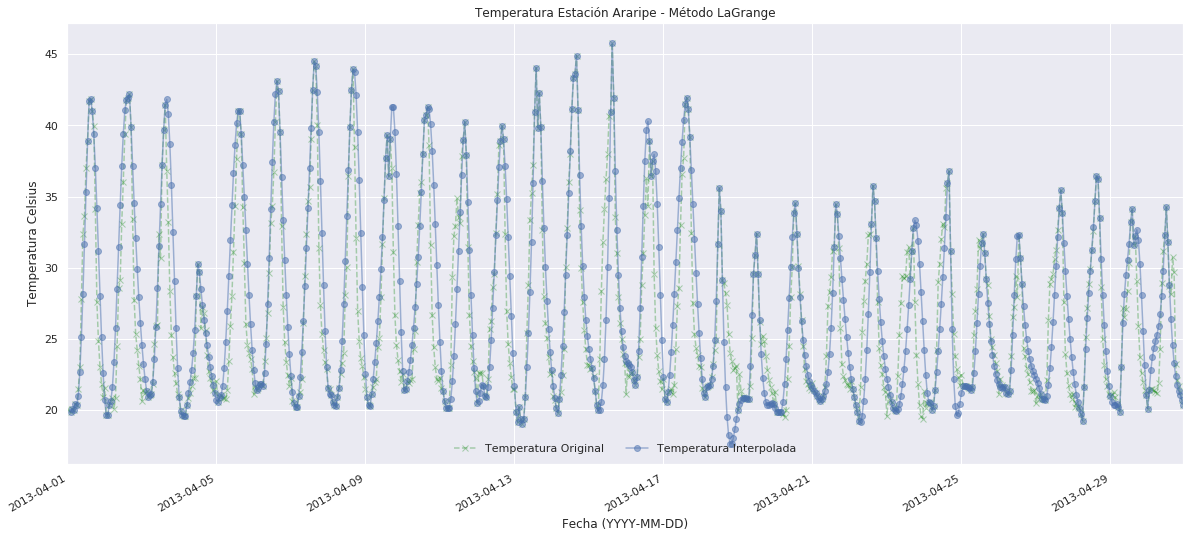

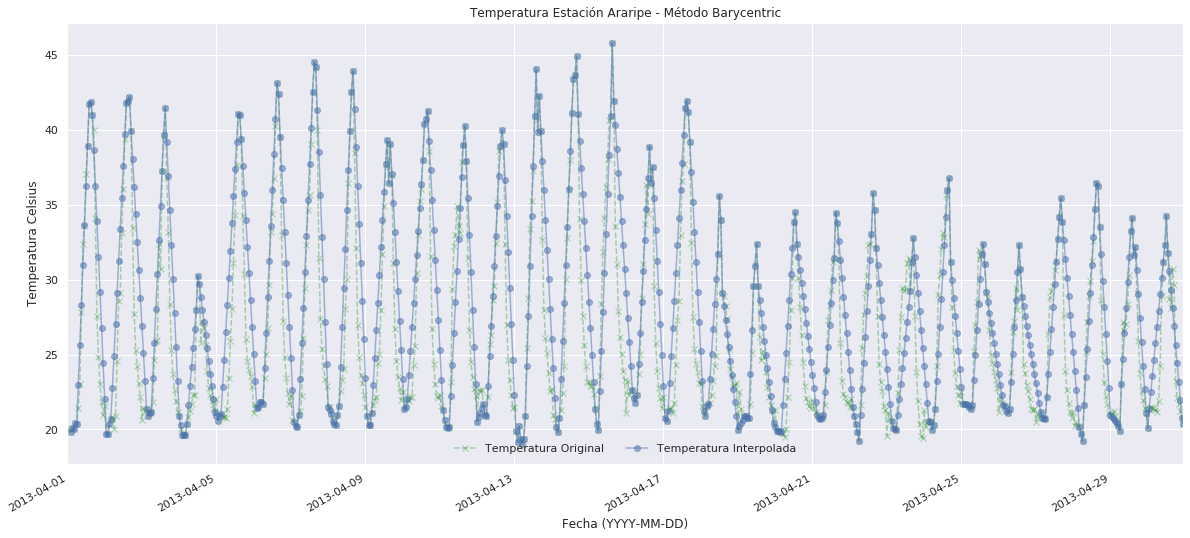

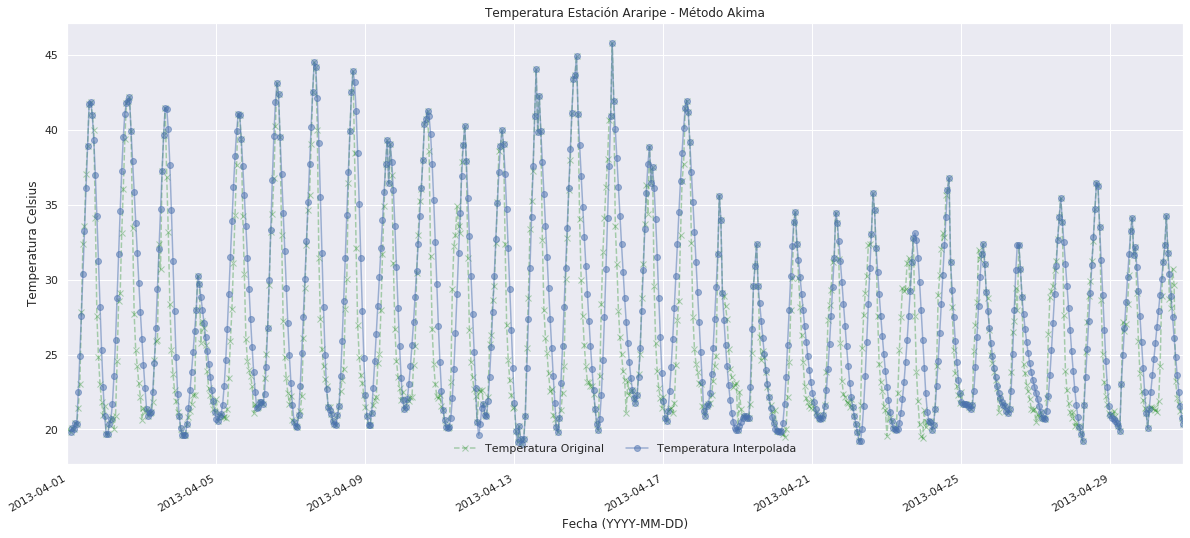

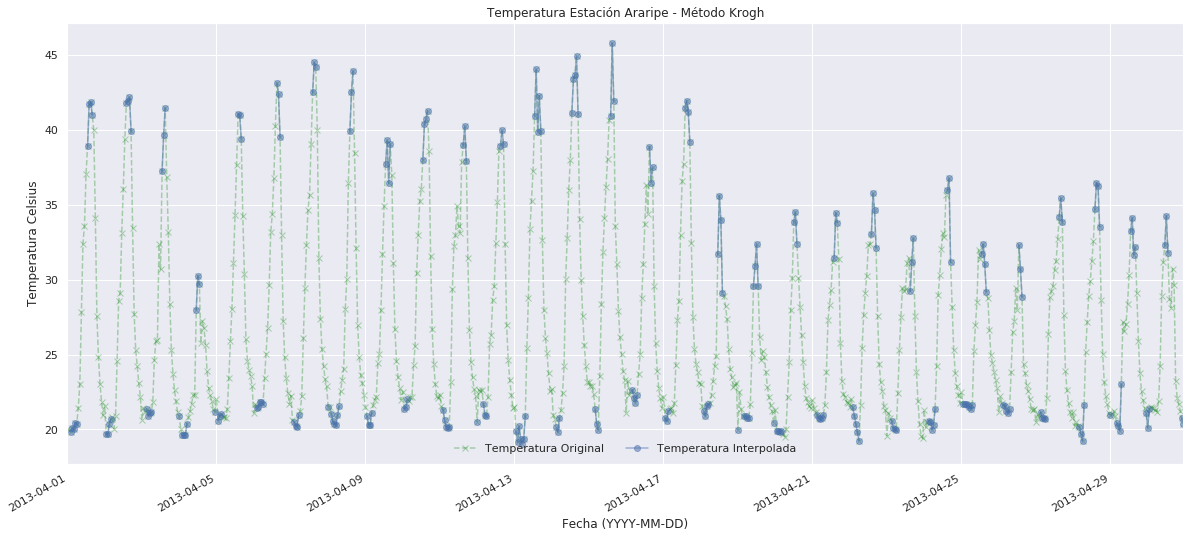

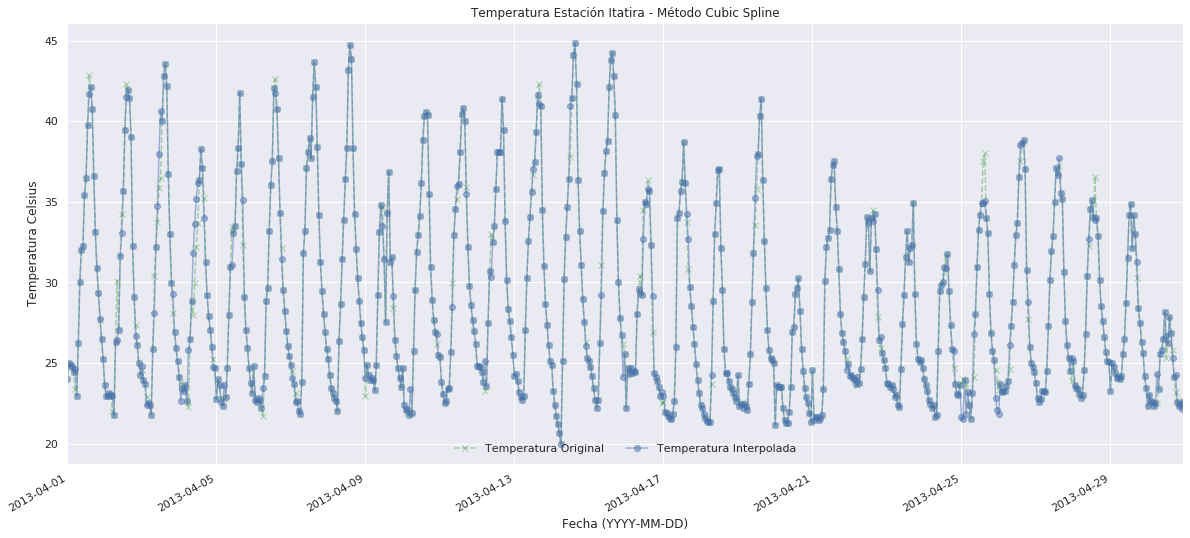

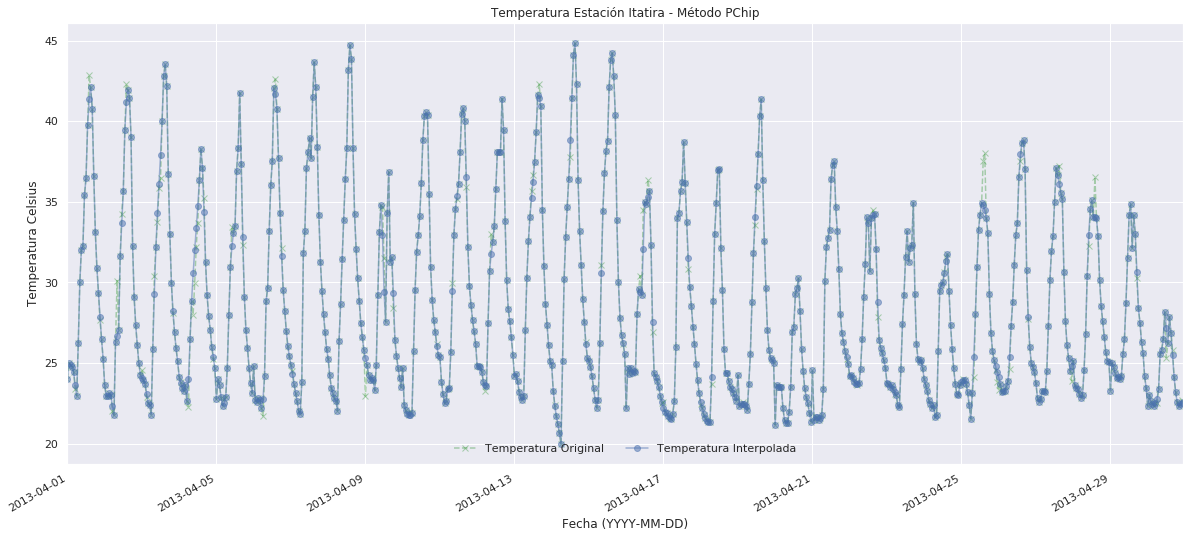

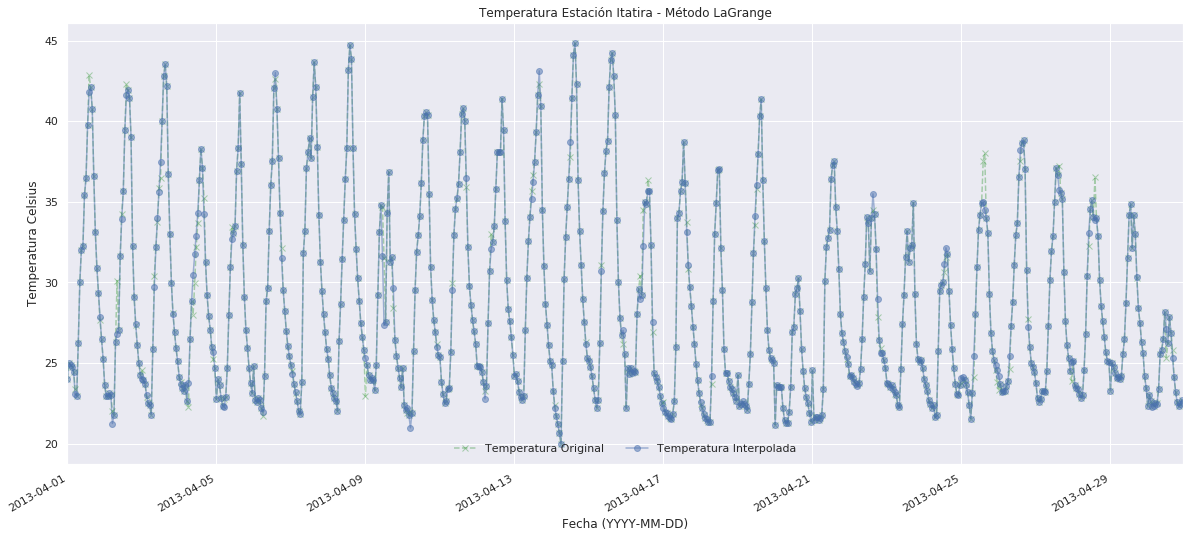

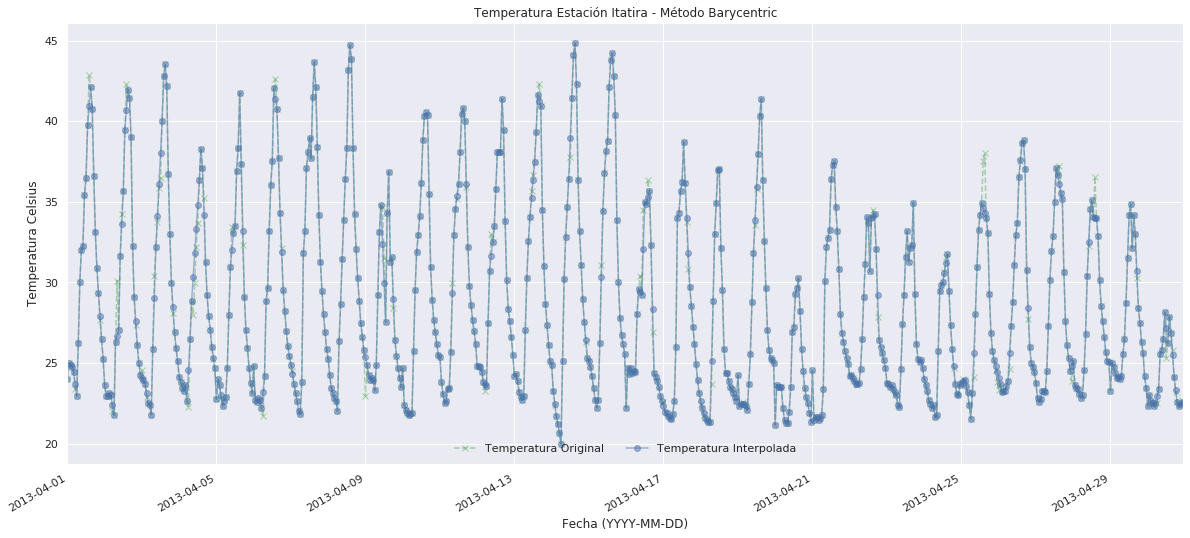

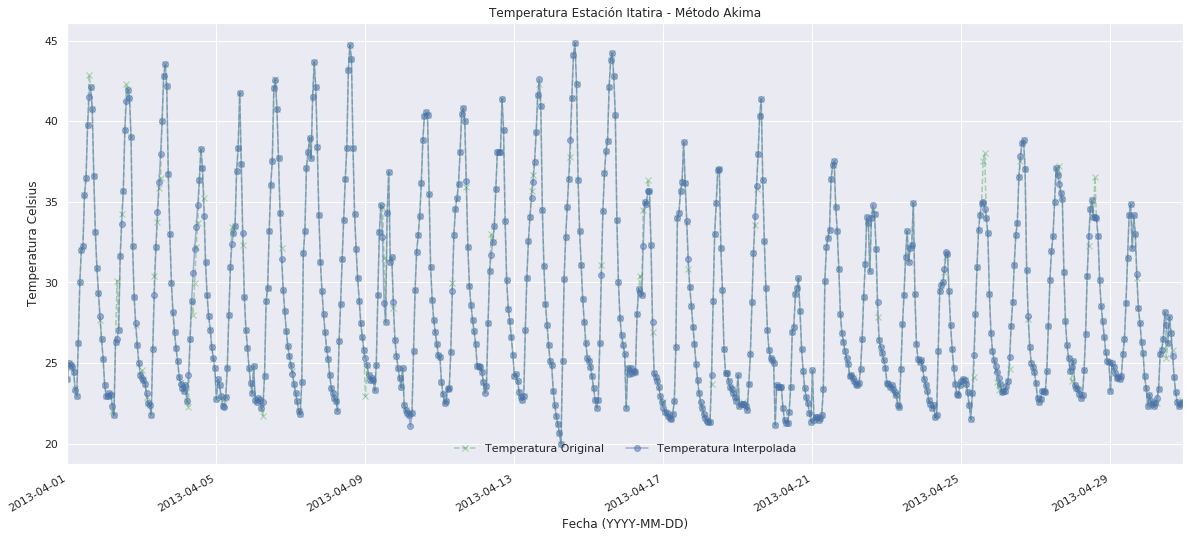

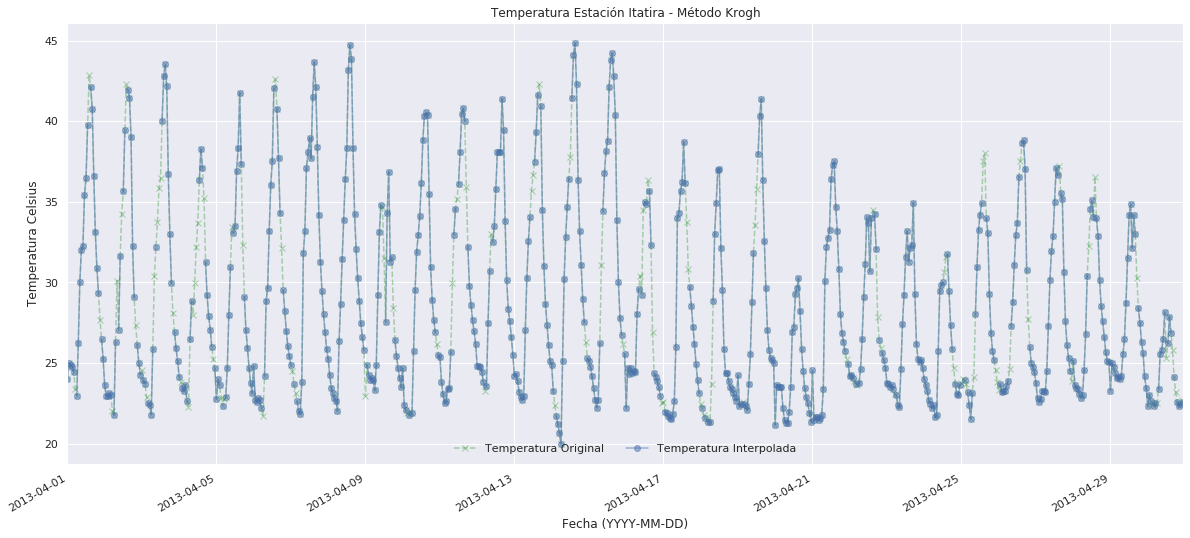

In [5]:
for i in range(len(interpolEval)):
    interpolEval[i] = interpolEval[i].resample('H').mean()
interpolEval[0]['Temperature'] = interpolEval[0]['Temperature'].interpolate(method='spline', order=3)
interpolEval[6]['Temperature'] = interpolEval[6]['Temperature'].interpolate(method='spline', order=3)
print("Spline Check")
interpolEval[1]['Temperature'] = interpolEval[1]['Temperature'].interpolate(method='pchip')
interpolEval[7]['Temperature'] = interpolEval[7]['Temperature'].interpolate(method='pchip')
print("PCHIP Check")
interpolEval[2]['Temperature'] = interpolEval[2]['Temperature'].interpolate(method='polynomial', order=3)
interpolEval[8]['Temperature'] = interpolEval[8]['Temperature'].interpolate(method='polynomial', order=3)
print("LaGrange Check")
interpolEval[3]['Temperature'] = interpolEval[3]['Temperature'].interpolate(method='time')
interpolEval[9]['Temperature'] = interpolEval[9]['Temperature'].interpolate(method='time')
print("Barycentric Check")
interpolEval[4]['Temperature'] = interpolEval[4]['Temperature'].interpolate(method='akima')
interpolEval[10]['Temperature'] = interpolEval[10]['Temperature'].interpolate(method='akima')
print("Akima CHeck")
interpolEval[5]['Temperature'] = interpolEval[5]['Temperature'].interpolate(method='krogh')
interpolEval[11]['Temperature'] = interpolEval[11]['Temperature'].interpolate(method='krogh')
print("Krogh Check")
method = ['Cubic Spline', 'PChip', 'LaGrange', 'Barycentric', 'Akima', 'Krogh', 'Cubic Spline', 'PChip', 'LaGrange', 'Barycentric', 'Akima', 'Krogh']
for i in range(6):
    ax = plt.subplots()
    ax = dataFrames[2]['Temperature'].plot(marker='x', alpha=0.3, linestyle='--', figsize=(20, 9), color='green', title='Temperatura Estación Araripe - Método ' + method[i], label='Temperatura Original')
    interpolEval[i]['Temperature'].plot( marker='o', alpha=0.5, linestyle='-', figsize=(20, 9), label='Temperatura Interpolada', ax=ax)
    ax.legend(frameon=False, loc='lower center', ncol=2)
    ax.set_xlabel("Fecha (YYYY-MM-DD)")
    ax.set_ylabel("Temperatura Celsius")
    plt.savefig("AraripeInt" + str(i) + ".eps")
for i in range(6, 12):
    ax = plt.subplots()
    ax = dataFrames[6]['Temperature'].plot(marker='x', alpha=0.3, linestyle='--', figsize=(20, 9), color='green', title='Temperatura Estación Itatira - Método '+ method[i], label='Temperatura Original')
    interpolEval[i]['Temperature'].plot( marker='o', alpha=0.5, linestyle='-', figsize=(20, 9), label='Temperatura Interpolada', ax=ax)
    ax.legend(frameon=False, loc='lower center', ncol=2)
    ax.set_xlabel("Fecha (YYYY-MM-DD)")
    ax.set_ylabel("Temperatura Celsius")
    plt.savefig("ItatiraInt" + str(i) + ".eps")
#Errors
#Compare two DataFrames
errorData = dataFrames[2].copy()
errorData.rename(columns={'Temperature':'OTemp'}, inplace=True)
result = []

for i in range(6):
    result.append(pd.concat([errorData, interpolEval[i]], axis=1).reindex(errorData.index))
    errorData = dataFrames[2].copy()
    errorData.rename(columns={'Temperature':'OTemp'}, inplace=True)
print(result[i])
for i in range(6):
    result[i]['AbsoluteError'] = abs(result[i]['OTemp'] - result[i]['Temperature'])
    result[i]['RelativeError'] = abs((result[i]['OTemp'] - result[i]['Temperature'])/result[i]['OTemp'])
for i in range(6,12):
    result.append(pd.concat([errorData, interpolEval[i]], axis=1).reindex(errorData.index))
    errorData = dataFrames[6].copy()
    errorData.rename(columns={'Temperature':'OTemp'}, inplace=True)
print(result[i])
for i in range(6,12):
    result[i]['AbsoluteError'] = abs(result[i]['OTemp'] - result[i]['Temperature'])
    result[i]['RelativeError'] = abs((result[i]['OTemp'] - result[i]['Temperature'])/result[i]['OTemp'])
print("--- Araripe Errores ---")
for i in range(12):
    if(i == 6):
        print("--- Itatira Errores ---")
    print("Method "+method[i])
    print("Absolute")
    print(result[i]['AbsoluteError'].mean())
    print("Relative")
    print(result[i]['RelativeError'].mean())


In [ ]:

ax = plt.subplots()
#Plot Original Data
ax = originalData['Temperature'].plot(marker='x', alpha=0.3, linestyle='--', figsize=(20, 9), color='green', title='Temperatura Estación Itatira', label='Temperatura Original')

#Interpolate Data
interpolData = dropData.copy()
interpolData = interpolData.resample('H').mean()
interpolData['Temperature'] = interpolData['Temperature'].interpolate(method='pchip')
#Plots of Interpolated Data
interpolData['Temperature'].plot( marker='o', alpha=0.5, linestyle='-', figsize=(20, 9), label='Temperatura Interpolada', ax=ax)
ax.legend(frameon=False, loc='lower center', ncol=2)
ax.set_xlabel("Fecha (YYYY-MM-DD)")
ax.set_ylabel("Temperatura Celsius")
plt.savefig("ItatiraInterpolCD.eps")



In [ ]:
ax = plt.subplots()
#Plot Original Data
ax = originalData['Relative Humidity'].plot(marker='x', alpha=0.3, linestyle='--', figsize=(20, 9), color='green', title='Humedad Relativa Estación Quixadá', label='Humedad Relativa Original')

#Interpolate Data
interpolData = dropData.copy()
interpolData = interpolData.resample('H').mean()
interpolData['Relative Humidity'] = interpolData['Relative Humidity'].interpolate(method='pchip')
#Plots of Interpolated Data
interpolData['Relative Humidity'].plot( marker='o', alpha=0.5, linestyle='-', figsize=(20, 9), label='Humedad Relativa Interpolada', ax=ax)
ax.legend(frameon=False, loc='lower center', ncol=2)
ax.set_xlabel("Fecha (YYYY-MM-DD)")
ax.set_ylabel("Humedad Relativa")
plt.savefig("QuixadaInterpolHumedadCD.eps")


In [ ]:
#Compare two DataFrames
errorData = originalData.copy()
errorData.rename(columns={'Temperature':'OTemp'}, inplace=True)
result = pd.concat([errorData, interpolData], axis=1).reindex(errorData.index)

result['AbsoluteError'] = result['OTemp'] - result['Temperature']
result['RelativeError'] = (result['OTemp'] - result['Temperature'])/result['OTemp']
print(result)

In [ ]:
result['AbsoluteError'].plot(title="Error Absoluto Temperatura Quixadá")
plt.savefig("ErrAbsItatiraInterpolCD.eps")

In [ ]:
result['RelativeError'].plot(title="Error Relativo Temperatura Itatira")
plt.savefig("ErrRelQuixadáInterpolCD.eps")